# Exploratory analysis Blackjack hands

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load and review Data

In [2]:
df = pd.read_csv('Data//blkjckhands.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   900000 non-null  int64 
 1   PlayerNo     900000 non-null  object
 2   card1        900000 non-null  int64 
 3   card2        900000 non-null  int64 
 4   card3        900000 non-null  int64 
 5   card4        900000 non-null  int64 
 6   card5        900000 non-null  int64 
 7   sumofcards   900000 non-null  int64 
 8   dealcard1    900000 non-null  int64 
 9   dealcard2    900000 non-null  int64 
 10  dealcard3    900000 non-null  int64 
 11  dealcard4    900000 non-null  int64 
 12  dealcard5    900000 non-null  int64 
 13  sumofdeal    900000 non-null  int64 
 14  blkjck       900000 non-null  object
 15  winloss      900000 non-null  object
 16  plybustbeat  900000 non-null  object
 17  dlbustbeat   900000 non-null  object
 18  plwinamt     900000 non-null  int64 
 19  dl

Our data doesn't have nulls.

In [4]:
df.head()

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12


Review values of the columns that we need to transform or delete.

### Analysis Features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| PlayerNo     |Identifies each player - There are 6 of them playing each round.||
| winloss     |Player WIn or Loss|this is the variable that we are interested in predicting|
| card1 |First card dealt to the player.|
| card2 |Second card dealt to the player.|
| card3 |Third card dealt to the player. (If needed else 0) |
| card4 |Fourth card dealt to the player. (If needed else 0) |
| card5 |Fifth card dealt to the player. (If needed else 0) |
| dealcard1 |First card dealt to the Dealer. |
| dealcard2 |Second card dealt to the Dealer. |
| dealcard3 |Third card dealt to the Dealer. (If needed else 0) |
| dealcard4 |Fourth card dealt to the Dealer. (If needed else 0) |
| dealcard5 | Fifth card dealt to the Dealer. (If needed else 0)|
| sumofcards |Sum of all cards of player|
| sumofdeal |Sum of all cards of Dealer|
|plwinamt |Total amount won by Player (each round)| 

In [5]:
print("PlayerNo: ",set(df['PlayerNo']))
print("blkjck: ",set(df['blkjck']))
print("winloss: ",set(df['winloss']))
print("plybustbeat: ",set(df['plybustbeat']))
print("dlbustbeat: ",set(df['dlbustbeat']))
print("plwinamt: ",set(df['plwinamt']))
print("ply2cardsum: ",set(df['ply2cardsum']))

PlayerNo:  {'Player5', 'Player3', 'Player1', 'Player2', 'Player6', 'Player4'}
blkjck:  {'nowin', 'Win'}
winloss:  {'Win', 'Push', 'Loss'}
plybustbeat:  {'Push', 'Plwin', 'Bust', 'DlBust', 'Beat'}
dlbustbeat:  {'Push', 'Bust', 'PlBust', 'Beat', 'Dlwin'}
plwinamt:  {0, 25, 10, 20}
ply2cardsum:  {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}


## Edit dataset

This step involves removing irrelevant columns such as PlayerNo, plybustbeat, and many more, and the code is pretty much self-explanatory

In [6]:
del df['Unnamed: 0']
del df['PlayerNo']
del df['dlbustbeat']
del df['plybustbeat']
del df['plwinamt']
del df['dlwinamt']

This step involves replacing the incomplete values or making the values more readable, such as in here the winloss field consists of the values 2, 1 and 0 being 2 as Loss, 1 as Push and 0 as Win, but it often seems ambiguous for the third person, so changing the value to an understandable one is a good idea.

In [7]:
blkjck_map= {'nowin':0, 'Win':1}
df['blkjck'] = df['blkjck'].map(blkjck_map)

In [8]:
winloss_map= {'Push':1, 'Loss':2, 'Win':0}
df['winloss'] = df['winloss'].map(winloss_map)

In [9]:
df.head()

,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,ply2cardsum
0,7,10,0,0,0,17,10,8,0,0,0,18,0,2,17
1,10,9,0,0,0,19,10,8,0,0,0,18,0,0,19
2,9,8,0,0,0,17,10,8,0,0,0,18,0,2,17
3,2,10,0,5,0,17,10,8,0,0,0,18,0,2,12
4,10,2,0,5,0,17,10,8,0,0,0,18,0,2,12


## Correlated feature check

In [10]:
df.describe()

,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,ply2cardsum
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,7.126259,7.089927,1.955088,2.336462,0.389787,18.897522,7.170380,7.129867,4.391293,1.380733,0.226433,20.298707,0.047846,1.048750,14.216186
std,2.994719,3.008032,3.531830,3.657284,1.730740,3.210611,2.981575,2.990306,4.080103,3.038298,1.334263,2.556207,0.213439,0.950806,4.429873
min,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,2.000000
25%,5.000000,4.000000,0.000000,0.000000,0.000000,17.000000,5.000000,5.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,12.000000
50%,8.000000,8.000000,0.000000,0.000000,0.000000,19.000000,8.000000,8.000000,4.000000,0.000000,0.000000,20.000000,0.000000,1.000000,14.000000
75%,10.000000,10.000000,2.000000,4.000000,0.000000,21.000000,10.000000,10.000000,9.000000,0.000000,0.000000,22.000000,0.000000,2.000000,18.000000
max,11.000000,11.000000,11.000000,10.000000,10.000000,26.000000,11.000000,11.000000,11.000000,10.000000,10.000000,26.000000,1.000000,2.000000,21.000000


<AxesSubplot:>

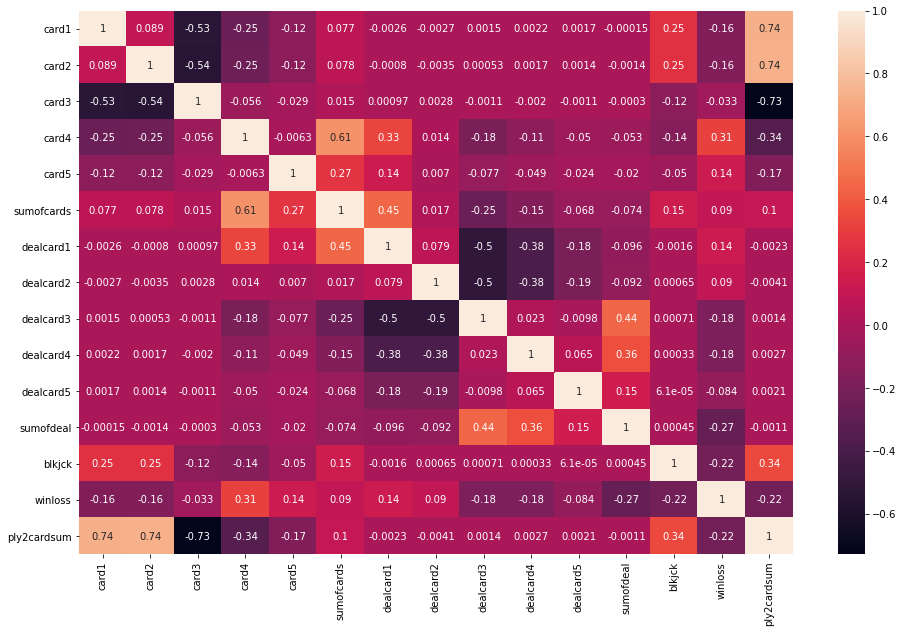

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

## Multilinear Regression

#### Probability that player wins with his first 2 cards and first dealer card

In [12]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
model = LinearRegression()

In [14]:
x = df[['card1','card2', 'dealcard1']].values
y = df["winloss"].values

In [15]:
model.fit(x,y)

LinearRegression()

In [16]:
print("coeficiente de determinacion:", model.coef_)
print("intercepto", model.intercept_)

coeficiente de determinacion: [-0.04708552 -0.04662319  0.0449917 ]
intercepto 1.3922409844517705


In [17]:
yPredict = model.predict(x)

In [18]:
card1 = 8
card2 = 10
dealcard1 = 10

In [19]:
print(model.predict([[card1, card2, dealcard1]]))

[0.99924197]


In [20]:
print("Score", r2_score(y, yPredict))
print("Error", mean_squared_error(y, yPredict))

Score 0.06770153844321625
Error 0.8428269112027816


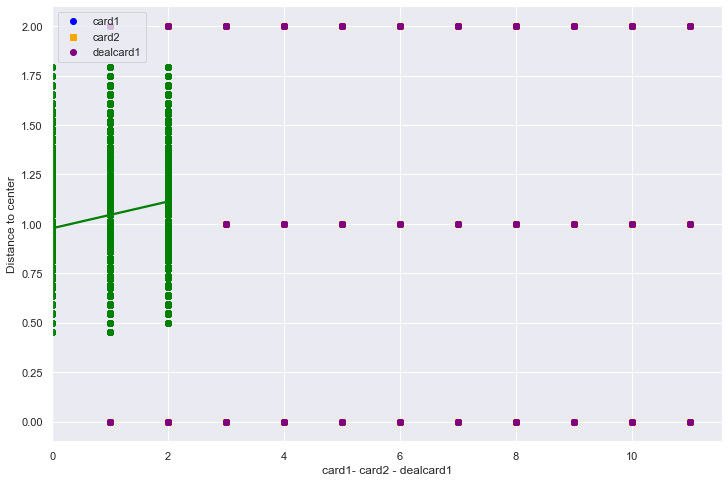

In [21]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(df['card1'], df['winloss'],
    c='blue', marker='o', label='card1')
plt.scatter(df['card2'], df['winloss'],
    c='orange', marker='s', label='card2')
plt.scatter(df['dealcard1'], df['winloss'],
    c='purple', marker='o', label='dealcard1')
sns.regplot(x=df['winloss'],y=yPredict, color='green')
plt.xlabel('card1- card2 - dealcard1')
plt.ylabel('Distance to center')
plt.legend(loc='upper left')

# Probability Model

The first rule of probability is that the probability must normalize. The sum of the probability of all events must equal 1. So if the probability of heads (Y = 1) is 0.5, then the probability of tails (the only other possible outcome) is given by
P(Y = 0) = 1 − P(Y = 1) = 0.5

Probabilities are often defined as the limit of the ratio between the number of positive outcomes (e.g. heads) given the number of trials. If the number of positive outcomes for event y is denoted by n and the number of trials is denoted by N then this gives the ratio

## Predicting sumofcards

In [22]:
x =  21
length = (df.sumofcards==x).sum()
print("Sumofcards length: ", length)

Sumofcards length:  93773


In winloss column we have 0 for win, 1 for push, 2 for loss

In [23]:
win = ((df.sumofcards==x)  & (df.winloss==0)).sum()
print("Win percentaje: {0} ({1:2.1f}%)".format(win,(win/length)*100))

Win percentaje: 82391 (87.9%)


In [24]:
loss = ((df.sumofcards==x)  & (df.winloss==2)).sum()
print("loss percentaje: {0} ({1:2.1f}%)".format(loss,(loss/length)*100))

loss percentaje: 0 (0.0%)


In [25]:
push = ((df.sumofcards==x)  & (df.winloss==1)).sum()
print("push percentaje: {0} ({1:2.1f}%)".format(push,(push/length)*100))

push percentaje: 11382 (12.1%)


## Predict blackjack

We want to see the probability win with a blackjack, In blkjck 1 is for win 0 is for nowin.

In [26]:
nowin = (df.blkjck==0).sum()
print("nowin length: ", nowin)

nowin length:  856939


In [27]:
win = (df.blkjck==1).sum()
print("win length: ", win)

win length:  43061


Obtaining results

In [28]:
win_blackjack = ((df.blkjck==1)& (df.winloss==0)).sum()
print("win_blackjack percentaje: {0} ({1:2.1f}%)".format(win_blackjack,(win_blackjack/win)*100))

win_blackjack percentaje: 37985 (88.2%)


In [29]:
loss_blackjack = ((df.blkjck==1)& (df.winloss==2)).sum()
print("loss_blackjack percentaje: {0} ({1:2.1f}%)".format(loss_blackjack,(loss_blackjack/win)*100))

loss_blackjack percentaje: 0 (0.0%)


In [30]:
push_blackjack = ((df.blkjck==1)& (df.winloss==1)).sum()
print("push_blackjack percentaje: {0} ({1:2.1f}%)".format(push_blackjack,(push_blackjack/win)*100))

push_blackjack percentaje: 5076 (11.8%)


## Predicting with 2 cards of player

In [31]:
x1 =  8
x2 = 9
length = ((df.card1==x1) & (df.card2 ==x2) ).sum()
print("card1 and car2 length: ", length)

card1 and car2 length:  5430


In [32]:
win = ((df.card1==x1) & (df.card2 ==x2)  & (df.winloss==0)).sum()
print("Win percentaje: {0} ({1:2.1f}%)".format(win,(win/length)*100))

Win percentaje: 1542 (28.4%)


In [33]:
loss = ((df.card1==x1) & (df.card2 ==x2)  & (df.winloss==2)).sum()
print("loss percentaje: {0} ({1:2.1f}%)".format(loss,(loss/length)*100))

loss percentaje: 3116 (57.4%)


In [34]:
push = ((df.card1==x1) & (df.card2 ==x2)  & (df.winloss==1)).sum()
print("push percentaje: {0} ({1:2.1f}%)".format(push,(push/length)*100))

push percentaje: 772 (14.2%)
